<a href="https://colab.research.google.com/github/tiffaniechoi/tiffaniechoi/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# HOMEWORK 1 - Remember to answer questions with comments and Python code to ensure you're communicating your answers effectively!
# If you have any general questions, please send them into the #bmgt438a-fall21 Slack channel!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('questselections18.csv')

In [65]:
# Take a look at the different columns to understand the data
df.head()

,id,credits,gpa,school,score,interview
0,1757,15,3.55,CMNS,3.5,1
1,1760,15,4.00,CMNS,4.0,1
2,1761,15,3.45,Clark,4.5,1
3,1762,18,3.40,Clark,4.5,1
4,1763,19,3.38,Smith,2.5,0


QUESTION 1: Let's start with addressing data quality issues. What issue(s) do you notice in this data and how can you clean it? Then, clean the dataframe. 
*Hint: This involves filtering (or removing rows) in your dataframe. Research how you may go about this.*

In [66]:
missing_values = []

for index, row in df.iterrows():
  if row['credits'] == 0 or row['gpa'] == 0:
    missing_values.append(index)
   
df = df.drop(missing_values)

df.head(10)

## I noticed that some rows either had missing credits or gpa (0 credits or gpa).
## I cleaned it by dropping all rows with the missing data. As shown above, 
## index 8 was one of the missing values, but it was now removed. 

,id,credits,gpa,school,score,interview
0,1757,15,3.55,CMNS,3.5,1
1,1760,15,4.00,CMNS,4.0,1
2,1761,15,3.45,Clark,4.5,1
3,1762,18,3.40,Clark,4.5,1
4,1763,19,3.38,Smith,2.5,0
5,1765,20,3.96,CMNS,3.0,1
6,1766,18,4.00,Clark,4.0,1
7,1768,17,3.37,Clark,3.0,0
9,1770,16,3.89,Smith,4.0,1
10,1771,17,4.00,Clark,4.0,1


QUESTION 2: Write some Python code to determine how many students are in CMNS, Clark, and Smith.


In [ ]:
cmns = np.where(df['school']=='CMNS')
clark = np.where(df['school']=='Clark')
smith = np.where(df['school']=='Smith')

cmns = len(cmns[0])
clark = len(clark[0])
smith = len(smith[0])

num_students =  cmns + clark + smith 

print('CMNS: ' + str(cmns))
print('Clark: ' + str(clark))
print('Smith: ' + str(smith))
print('\nThere are a total of ' + str(num_students) + 
      ' students in CMNS, Clark, and Smith.')

# There are 71 students in CMNS, 61 students in Clark, and 94 students in Smith. 
# There are a total of 226 students in CMNS, Clark, and Smith.

CMNS: 71
Clark: 61
Smith: 94

There are a total of 226 students in CMNS, Clark, and Smith.


QUESTION 3: We are interested in the determining if school (CMNS vs Clark vs Smith) has any effect on whether or not an applicant gets an interview.
Write code to find the numbers of applicants that get interviews from each school. Which school had the most applicants with interviews? Why could this the case?

In [ ]:
interviews = {'CMNS': 0, 'Clark': 0, 'Smith': 0}

for index, row in df.iterrows():
  school = row['school']
  interview = row['interview']

  interviews[school] += interview

interviews
  
# {'CMNS': 45, 'Clark': 45, 'Smith': 56}

# Smith school had the most applicants with interviews. This could be the case
# because Smith school had the highest number of applicants overall compared to 
# CMNS and Clark as shown in the data above.

{'CMNS': 45, 'Clark': 45, 'Smith': 56}

QUESTION 4: We are interested in determining the relationships between school (CMNS vs Clark vs Smith) and application score. Create a boxplot to examine this
relationship between school and application score. What do you notice?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


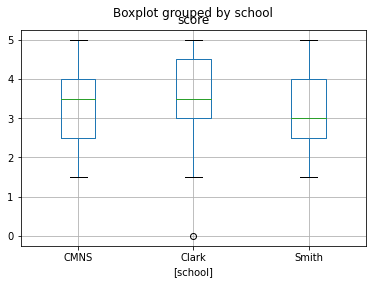

In [ ]:
boxplot = df.boxplot(column=['score'], by=['school'])

## I notice that Clark school has the highest upper quartile of scores compared 
## to CMNS and Smith, and Smith and CMNS has the lowest quartile of scores 
## compared to the Clark.

## I also notice that CMNS and Clark school has the same median score, and 
## Smith school has the lowest median score. 

## Lastly, I notice that all schools has the same max and min for scores overall. 

QUESTION 5: The 'id' variable is an ordinal variable, meaning that the smaller the id, the earlier the particular student started the application. We're
interested in finding out whether students who started applying earlier tended to get a better application score. Create a scatterplot of ID vs Score, and then
explain what you see in your scatterplot and what it means in terms of the question.

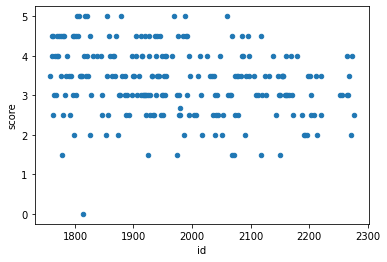

In [ ]:
scatter = df.plot.scatter(x = 'id',y = 'score')

## I see that the scores are higher for lower value IDs. This means that people
## who applied earlier in the process had more higher scores compared to people 
## who applied later in the application process. 

Challenge Question (optional):

A natural question that rises is: what attributes should a student focus on in order to have the best chance at landing an interview? Although typically students are encounraged to be well-rounded, in this exercise we will see which feature (column) other than "interview" best stratifies the interview column. We will learn more about this type of feature selection when we discuss Decision Trees (a machine learning tool), but here's a taste.

In [ ]:
import math # in order to use the log function

# Question 1: We will calculate a metric that tells us how much variance is in the data called ~entropy~.

# Note: Entropy(feature) = -1 * (p_1*log_2(p_1) + ... + p_n*log_2(p_n)), where feature has n different choices/classes,
# each p_i denotes the probability of that class occuring, and log_2 is log base 2.
# (ie. p_i = (# of rows where feature == i) / (total number of rows))

# Part 1:
# Calculate the entropy for the interview column (Hint: This column only has 2 classes, n=2)

# Part 2:
# Select the rows where school == CMNS, then calculate the entropy of interview on that subset
# Then print the entropy value

# Part 3:
# Repeat the same steps for school == Clark and school == Smith (copy-pasta is fine :)
# Then print the entropy value

In [ ]:
# Question 2:
# Now we will do something similar with the gpa column. But since gpa is numerical, 
# we will split it into >= 3.5 and < 3.5 to make our lives easier.

# Part 1: Create a new column called gpa_3.5 where entries are 1 if gpa >= 3.5 and 0 when gpa < 3.5.

# Part 2: Repeat part 2 from the previous question for the gpa_3.7 column 
# (ie. subset by gpa_3.7 == 1 then gpa_3.7 == 0, etc)
# Print the entropies

# Part 3: 
# Calculate and print the difference between the entropy of interview (Q1.1) and 
# the weighted average of 3 entropies from Question 1, Parts 2-3.
# ie: Q1.1 - sum((# of rows where school == value) / (total number of rows) * Entropy(school==value))

# Calculate and print the difference between the entropy of interview (Q1.1) and 
# the weighted average of 2 entropies from Question 2, Part 2.

# This metric called the information gain is be used to compare the school and gpa_3.5 features in order to 
# determine which feature better stratifies the target feature, interview. 
    
# Which feature yields a higher information gain?

# Stratifying by school yields a higher information gain.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e1cde5da-60e7-4582-8334-3d1f8b4b8fb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>